In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from zipfile import ZipFile
import os
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
from scipy import stats

In [57]:
#Read all the weather csv files and combine all data into a dataframe
path = r'yvr-weather'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, header = 14) for f in all_files)
data  = pd.concat(df_from_each_file, ignore_index=True)

#regerence :https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [58]:
data.drop(['Data Quality', 'Temp Flag','Dew Point Temp Flag','Rel Hum Flag','Wind Dir Flag',
           'Wind Spd Flag','Visibility Flag','Stn Press Flag','Hmdx Flag','Wind Chill','Wind Chill Flag'], axis=1, inplace=True)

In [59]:
data_useful = data

In [60]:
def im_to_data(im):
    a = Image.open(im).convert('F')
    #pix = np.array(a)
    b = a.getdata()
    #c = b.tolist()
    #c= pix.reshape(-1)
    #rawIm = raw.tolist()
    #c.astype(float)
    c = pd.Series(b)
    return (c)

In [61]:
def get_im_name(im):
    base=os.path.basename(im)
    return (pd.Series(base))

In [62]:
def im_to_df(im):
    df = pd.concat([im_to_data(im),get_im_name(im)], axis=1)
    df.columns = ['Image_value','Image_name']
    return df
    

In [63]:
#Read all the katkam-scaled image and combine all data into a dataframe
path = r'test1_1200'                     # use your path
allimage = glob.glob(os.path.join(path, "*.jpg"))     # advisable to use os.path.join as this makes concatenation OS independent
im_number = len(allimage)
chunks=[]
i = 0
for f in allimage:
    df_from_each = (im_to_df(f) )
    chunks.append(df_from_each)
    i +=1
    print ('Processing Images :',i,'out of', im_number,'finished')
imagedata  = pd.concat(chunks, ignore_index=True)


Processing Images : 1 out of 1200 finished
Processing Images : 2 out of 1200 finished
Processing Images : 3 out of 1200 finished
Processing Images : 4 out of 1200 finished
Processing Images : 5 out of 1200 finished
Processing Images : 6 out of 1200 finished
Processing Images : 7 out of 1200 finished
Processing Images : 8 out of 1200 finished
Processing Images : 9 out of 1200 finished
Processing Images : 10 out of 1200 finished
Processing Images : 11 out of 1200 finished
Processing Images : 12 out of 1200 finished
Processing Images : 13 out of 1200 finished
Processing Images : 14 out of 1200 finished
Processing Images : 15 out of 1200 finished
Processing Images : 16 out of 1200 finished
Processing Images : 17 out of 1200 finished
Processing Images : 18 out of 1200 finished
Processing Images : 19 out of 1200 finished
Processing Images : 20 out of 1200 finished
Processing Images : 21 out of 1200 finished
Processing Images : 22 out of 1200 finished
Processing Images : 23 out of 1200 finish

In [64]:
imname = imagedata.Image_name.str.split(pat= '.').str[0].str.split(pat='-').str[1]

In [65]:
imagedata['image_date'] = imname

In [66]:
image_data = imagedata.drop(['Image_name'],axis= 1) #The final data set for images

In [67]:
date_string = data_useful['Date/Time'].str.replace('-','').str.replace(' ','').str.replace(':','')

In [68]:
data_useful['date/time'] = date_string

In [69]:
image_time = [x[:-2] for x in imname]  #inmage_time has same format with weather dataframe 

In [70]:
image_data['date/time'] = image_time

In [71]:
image_df = image_data.drop(['image_date'],axis = 1) #image_df is what we need to join with weather df

In [72]:
df_merged = pd.merge(data_useful, image_df, on='date/time') # the merged df for train

In [73]:
df_final = df_merged.drop(['Hmdx'],axis=1).dropna(axis=0, how = 'any')

In [74]:
x = df_final['Image_value']


In [75]:
needed = np.asarray(list([list(x) for x in np.asarray(x)])) #array for train (X)
y = df_final['Weather'] #array for y

In [76]:
X_train, X_test, y_train, y_test = train_test_split(needed, y)
#needed


In [77]:
#Bayesian Classifier
model = GaussianNB()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('Bayesian Classifier model score:',model.score(X_test, y_test))
#print(model.score(X_test, y_test))

Bayesian Classifier model score: 0.383177570093


In [78]:
#knn
model = KNeighborsClassifier(n_neighbors=32)
model.fit(X_train, y_train)
print('Knn model score:',model.score(X_test, y_test))

Knn model score: 0.411214953271


In [79]:
#knn + feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=32)
)
model.fit(X_train, y_train)
print('knn + feature scaling model score:',model.score(X_test, y_test))

knn + feature scaling model score: 0.373831775701


In [80]:
#SVM
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1e-2)
)
model.fit(X_train, y_train)
print('SVC + feature scaling model score:',model.score(X_test, y_test))

SVC + feature scaling model score: 0.383177570093


In [81]:
model = make_pipeline(
    PCA(200),
    SVC(kernel='linear', C=1e-2)
)
model.fit(X_train, y_train)
print('SVC + PCA model score:',model.score(X_test, y_test))


SVC + PCA model score: 0.439252336449


In [82]:
print('******************All these scores are not good. We are expecting more accuracy!**************')

******************All these scores are not good. We are expecting more accuracy!**************


In [83]:
print('***************Section 2   More working on weather data set!******************')
print('***************Add some new features to Weather Condition.********************')
print('***************Temperature Feeling: Freezing,Cold,Normal,Warm,Hot*************')
print('***************Wind Intensity: Strong, Moderate, Weak*************************')
print('***************Visibility: Far, Medium, Limited*******************************')

***************Section 2   More working on weather data set!******************
***************Add some new features to Weather Condition.********************
***************Temperature Feeling: Freezing,Cold,Normal,Warm,Hot*************
***************Wind Intensity: Strong, Moderate, Weak*************************
***************Visibility: Far, Medium, Limited*******************************


In [84]:
df_todo = df_final

In [85]:
firstword = df_todo['Weather'].str.split(pat= ',').str[0]#.str.split(pat = ' ').str[0]
#secondword = df_todo['Weather'].str.split(pat= ',').str[0].str.split(pat = ' ').str[1]
thirdword = df_todo['Weather'].str.split(pat= ',').str[1]

In [86]:
df_todo['MainFeature'] = firstword
#df_todo['secondword'] = secondword
df_todo['SecondaryFeature'] = thirdword

In [87]:
# function to get wind scale
#  Reference: https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
def f1(row):
    if (row['Wind Spd (km/h)'] <= 10):
        val = 'Weakwind'
    elif ( 10 < row['Wind Spd (km/h)'] <=20) :
        val = 'ModerateWind'
    else:
        val = 'HeavyWind'
    return val

In [88]:
df_todo['WindScale'] = df_todo.apply(f1, axis=1)

In [89]:
# function to get temperature feeling
def f2(row):
    if (row['Temp (°C)'] <= 0):
        val = 'ColdFeeling'
    elif ( 0 < row['Temp (°C)'] <=20) :
        val = 'NormalFeeling'
    else:
        val = 'HotFeeling'
    return val

In [90]:
df_todo['TemperatureFeeling'] = df_todo.apply(f2, axis=1)

In [91]:
# function to get visibility scale
def f3(row):
    if (0 <= row['Visibility (km)'] <= 20):
        val = 'LimitedVisibility'
    elif ( 20 < row['Visibility (km)'] <=40) :
        val = 'MediumVisibility'
    else:
        val = 'FarVisibility'
    return val

In [92]:
df_todo['VisibilityScale'] = df_todo.apply(f3, axis=1)

In [93]:
# function to find if the day had fog
def f4(row):
    if ((row['MainFeature'] =='Fog')|(row['SecondaryFeature'] =='Fog')|( row['MainFeature'] =='Freezing Fog')):
        val = 'Fog'
    else:
        val = 'NoFog'
    return val

In [94]:
df_todo['IfFog'] = df_todo.apply(f4, axis=1)

In [95]:
# function to get main weather info: Clear, Mainly Clear,Mostly Cloudy,Cloudy,Rain,
# Moderate Rain,Rain Showers,Drizzle,Snow, Snow Showers, Moderate Snow
def f5(row):
    if ((row['MainFeature'] =='Clear') | (row['SecondaryFeature'] =='Clear')) :
        val = 'Clear'
    elif ((row['MainFeature'] =='Mainly Clear') | (row['SecondaryFeature'] =='Mainly Clear') ) :
        val = 'Mainly Clear'
    elif ((row['MainFeature'] =='Mostly Cloudy') | (row['SecondaryFeature'] =='Mostly Cloudy') ) :
        val = 'Mostly Cloudy'
    elif ((row['MainFeature'] =='Cloudy') | (row['SecondaryFeature'] =='Cloudy') ) :
        val = 'Cloudy'
    elif ((row['MainFeature'] =='Rain') | (row['SecondaryFeature'] =='Rain') ) :
        val = 'Rain'
    elif ((row['MainFeature'] =='Moderate Rain') | (row['SecondaryFeature'] =='Moderate Rain') ) :
        val = 'Moderate Rain'
    elif ((row['MainFeature'] =='Rain Showers') | (row['SecondaryFeature'] =='Rain Showers') ) :
        val = 'Rain Showers'
    elif ((row['MainFeature'] =='Drizzle') | (row['SecondaryFeature'] =='Drizzle') ) :
        val = 'Drizzle'
    elif ((row['MainFeature'] =='Snow') | (row['SecondaryFeature'] =='Snow') ) :
        val = 'Snow'
    elif ((row['MainFeature'] =='Snow Showers') | (row['SecondaryFeature'] =='Snow Showers') ) :
        val = 'Snow Showers'
    elif ((row['MainFeature'] =='Moderate Snow') | (row['SecondaryFeature'] =='Moderate Snow') ) :
        val = 'Moderate Snow'
    else:
        val = 'Unknown Weather'
    return val

In [96]:
df_todo['WeatherInfo'] = df_todo.apply(f5, axis=1)

In [97]:
WeatherSummary = df_todo['WeatherInfo'] +','+ df_todo['TemperatureFeeling'] +',' + df_todo['WindScale'] + ',' \
+ df_todo['VisibilityScale'] + ',' + df_todo['IfFog']

In [98]:
df_todo['WeatherSummary'] = WeatherSummary

In [99]:
df_better = df_todo #we have got the cleaned and better data

In [100]:
#Train and Test again
y2 = df_better['WeatherSummary']

In [101]:
X2_train, X2_test, y2_train, y2_test = train_test_split(needed, y2)


In [102]:
#Bayesian Classifier
model = GaussianNB()
model.fit(X2_train, y2_train)
y2_predicted = model.predict(X2_test)
print('Bayesian Classifier model score:',model.score(X2_test, y2_test))
#print(model.score(X_test, y_test))

Bayesian Classifier model score: 0.0934579439252


In [103]:
#knn
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X2_train, y2_train)
print('Knn model score:',model.score(X2_test, y2_test))

Knn model score: 0.0747663551402


In [104]:
#knn + feature scaling
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=20)
)
model.fit(X2_train, y2_train)
print('knn + feature scaling model score:',model.score(X2_test, y2_test))

knn + feature scaling model score: 0.0747663551402


In [105]:
#SVM
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1e-2)
)
model.fit(X2_train, y2_train)
print('SVM + feature scaling model score:',model.score(X2_test, y2_test))

SVM + feature scaling model score: 0.130841121495


In [106]:
#PCA
model = make_pipeline(
    PCA(200),
    SVC(kernel='linear', C=1e-2)
)
model.fit(X_train, y_train)
print('PCA + SVC model score:',model.score(X2_test, y2_test))

PCA + SVC model score: 0.0


In [107]:
print('***********************OH!!!Thins are getting worese!WHY??!?!?!?!?***********************************')
print('******The reason is that the WeatherSummary now is a long string contains all the weather details****')
print('******This makes all the model even more hard to get good predictions with a long feature************')
print('******Section 3!! Try to use less constraints for weahter condition********************************************')

***********************OH!!!Thins are getting worese!WHY??!?!?!?!?***********************************
******The reason is that the WeatherSummary now is a long string contains all the weather details****
******This makes all the model even more hard to get good predictions with a long feature************
******Section 3!! Try to use less constraints for weahter condition********************************************


In [108]:
print('******What if we just want to know if oneday is Main weatherinfo: rain/snow/cloudy/etc.. and TemperatureFeeling***' )

******What if we just want to know if oneday is Main weatherinfo: rain/snow/cloudy/etc.. and TemperatureFeeling***


In [109]:
df_better['WeatherInfo+Temper_Feeling'] = df_better['WeatherInfo']+','+ df_better['TemperatureFeeling']

In [110]:
#Train and Test again
y3 = df_better['WeatherInfo+Temper_Feeling']
X3_train, X3_test, y3_train, y3_test = train_test_split(needed, y3)

In [111]:
#Bayesian Classifier
model = GaussianNB()
model.fit(X3_train, y3_train)
y3_predicted = model.predict(X3_test)
print('Bayesian Classifier model score:',model.score(X3_test, y3_test))
#print(model.score(X_test, y_test))

Bayesian Classifier model score: 0.289719626168


In [112]:
#knn
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X3_train, y3_train)
print('Knn model score:',model.score(X3_test, y3_test))

Knn model score: 0.308411214953


In [113]:
#knn + feature scaling
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=20)
)
model.fit(X3_train, y3_train)
print('knn + feature scaling model score:',model.score(X3_test, y3_test))

knn + feature scaling model score: 0.308411214953


In [114]:
#SVM
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1)
)
model.fit(X3_train, y3_train)
print('SVM + feature scaling model score:',model.score(X3_test, y3_test))

SVM + feature scaling model score: 0.308411214953


In [115]:
print('******It is better right?? Considering that weather is so unpridictable, this result is acceptable though***')

******It is better right?? Considering that weather is so unpridictable, this result is acceptable though***


In [116]:
print('******Section 4! Let us try to use images to predict what time is it! Sounds interesting!************')

******Section 4! Let us try to use images to predict what time is it! Sounds interesting!************


In [117]:
y4 = df_better['Time']
X4_train, X4_test, y4_train, y4_test = train_test_split(needed, y4)

In [118]:
#Bayesian Classifier
model = GaussianNB()
model.fit(X4_train, y4_train)
y4_predicted = model.predict(X4_test)
print('Bayesian Classifier model score:',model.score(X4_test, y4_test))
#print(model.score(X_test, y_test))

Bayesian Classifier model score: 0.598130841121


In [119]:
#knn
model = KNeighborsClassifier(n_neighbors=60)
model.fit(X4_train, y4_train)
print('Knn model score:',model.score(X4_test, y4_test))

Knn model score: 0.504672897196


In [120]:
#SVM
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1e-2)
)
model.fit(X4_train, y4_train)
print('SVM + feature scaling model score:',model.score(X4_test, y4_test))

SVM + feature scaling model score: 0.663551401869


In [121]:
print('******Only getting some model scores is not funny at all!! We need some analysis for data sets*****')
print('******Section 5: Data sets analysis****************************************************************')

******Only getting some model scores is not funny at all!! We need some analysis for data sets*****
******Section 5: Data sets analysis****************************************************************


In [122]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
from scipy import stats

In [123]:
df_better['Created_at'] = pd.to_datetime(df_better['Date/Time'],format="%Y-%m-%d %H:%M:%S.%f")

In [159]:
def to_timestamp(data):
    return data.timestamp()


In [160]:
df_better['timestamp'] = df_better['Created_at'].apply(to_timestamp)

In [161]:
fit1 = slope, intercept, r_value, p_value, std_err = stats.linregress(df_better.timestamp, df_better['Temp (°C)'].astype('float'))

fit2 = slope, intercept, r_value, p_value, std_err = stats.linregress(df_better.timestamp, df_better['Wind Spd (km/h)'].astype('float'))

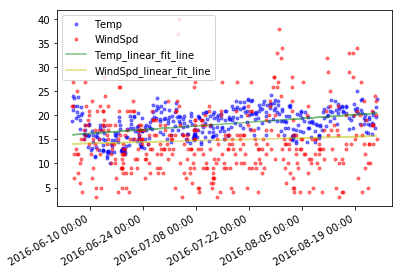

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

#times = pd.date_range('2015-10-06', periods=500, freq='10min')

fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(df_better['Created_at'],df_better['Temp (°C)'],'b.',alpha = 0.5,label='Temp')
plt.plot(df_better['Created_at'],df_better['Wind Spd (km/h)'],'r.',alpha = 0.5,label='WindSpd')
plt.plot(df_better['Created_at'],df_better['timestamp']*fit1.slope + fit1.intercept,'g-',alpha = 0.5,label='Temp_linear_fit_line')
plt.plot(df_better['Created_at'],df_better['timestamp']*fit2.slope + fit2.intercept,'y-',alpha = 0.5,label='WindSpd_linear_fit_line')
xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.legend(loc='upper left')
ax.xaxis.set_major_formatter(xfmt)
plt.savefig('Temp_WindSpd_Liner_Fit.jpeg')
plt.show()

#regerence https://stackoverflow.com/questions/32972371/how-to-show-date-and-time-on-x-axis-in-matplotlib

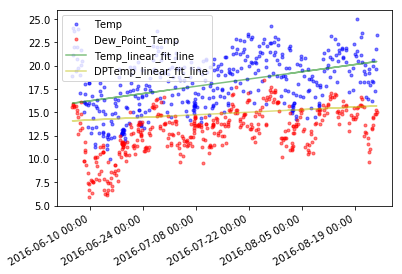

In [301]:
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(df_better['Created_at'],df_better['Temp (°C)'],'b.',alpha = 0.5,label='Temp')
plt.plot(df_better['Created_at'],df_better['Dew Point Temp (°C)'],'r.',alpha = 0.5,label='Dew_Point_Temp')
plt.plot(df_better['Created_at'],df_better['timestamp']*fit1.slope + fit1.intercept,'g-',alpha = 0.5,label='Temp_linear_fit_line')
plt.plot(df_better['Created_at'],df_better['timestamp']*fit2.slope + fit2.intercept,'y-',alpha = 0.5,label='DPTemp_linear_fit_line')
xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.legend(loc='upper left')
ax.xaxis.set_major_formatter(xfmt)
plt.savefig('Temp_DPTemp_Liner_Fit.jpeg')
plt.show()

In [334]:
print('**********Linear Fit does not work here. We need higher-order polynomial regression******')
print('**********But time is running out.....***************************************************')

**********Linear Fit does not work here. We need higher-order polynomial regression******
**********But time is running out.....***************************************************
